In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Chapter 3 : 3차원 공간에서 벡터 그리기

## 파이썬으로 3차원 그림 그리기

In [55]:
from draw3d import *

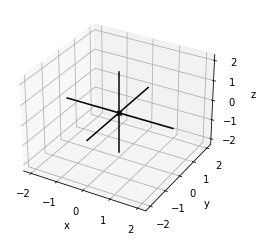

In [56]:
draw3d()

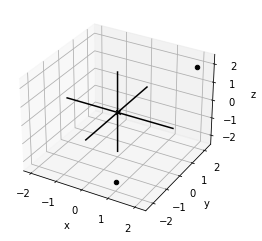

In [57]:
draw3d(Points3D((2,2,2), (1,-2,-2)))

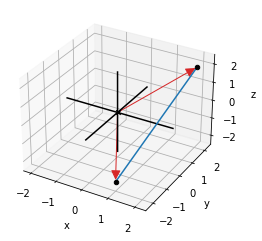

In [58]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

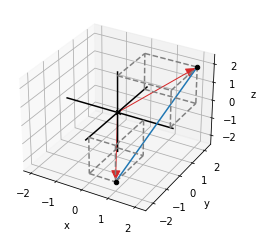

In [59]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

## 연습문제

1. 좌표 (-1,-2,2)를 나타내는 3차원 화살표와 점을 그리고, 화살표를 3차원처럼 보이게 하는 점선 박스를 그려라.

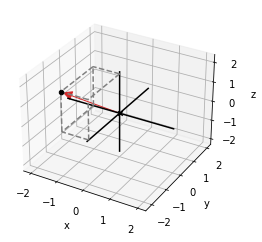

In [60]:
v = (-1,-2,2)
draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v)
)

2. 각 좌표가 +1 또는 -1인 3차원 벡터는 총 8가지이다. 8개의 벡터를 점으로 플로팅하라.

In [61]:
pm1 = [1,-1]

In [62]:
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]

In [63]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
 [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
 [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

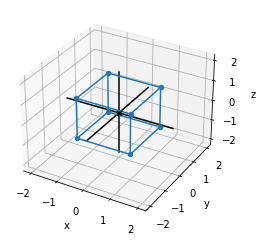

In [64]:
draw3d(
 Points3D(*vertices,color=blue),
 *[Segment3D(*edge) for edge in edges]
)

# 3차원에서의 벡터 산술

### 3차원 벡터 더하기

In [65]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [66]:
list(zip(*[(1,1,3), (2,4,-4), (4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

In [67]:
[sum(coords) for coords in [(1,2,4), (1,4,2), (3,-4,-2)]]

[7, 7, -3]

In [68]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

In [69]:
add((1,1,3),(2,4,-4),(4,2,-2))

(7, 7, -3)

### 길이와 거리 계산하기

In [70]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [71]:
add((4,0,3), (-1,0,1))

(3, 0, 4)

## 연습문제

3. 두 벡터 (4,0,3)과 (-1,0,1)을 Arrow3D 객체로 그리되, 두 벡터를 3차원 상에서 삼각형법으로 가능한 두 가지 순서대로 배치해 그려라.

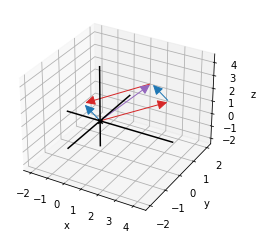

In [72]:
draw3d(
 Arrow3D((4,0,3),color=red),
 Arrow3D((-1,0,1),color=blue),
 Arrow3D((3,0,4),(4,0,3),color=blue),
 Arrow3D((-1,0,1),(3,0,4),color=red),
 Arrow3D((3,0,4),color=purple)
)

4. 다음 리스트 컴프리헨션은 24개의 파이썬 벡터로 이루어진 리스트를 만든다.\
from math import sin, cos, pi\
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]\
이 24개 벡터의 합을 구하라. Arrow3D 객체로 삼각형법을 사용해 24개 벡터 모두를 그려라.

In [73]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


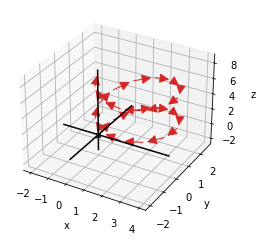

In [74]:
running_sum = (0,0,0) # 중간합을 저장하는 변수는 삼각형법 덧셈의 시작점인 (0, 0, 0)에서 시작한다.
arrows = [] 
for v in vs:
#직전 벡터가 이번 벡터의 꼬리를 물도록 기존 중간합에 이번 벡터를 더한다.새로운 화살표는 기존 중간합과 다음 중간합을 연결한다.
    next_sum = add(running_sum, v) 
    arrows.append(Arrow3D(next_sum, running_sum)) 
    running_sum = next_sum 
print(running_sum)
draw3d(*arrows)

5. 입력으로 주어진 스칼라값과 벡터를 곱해서 리턴하는 함수 scale(scalar, vector)를 작성하라.

In [75]:
def scale(scalar,v):
 return tuple(scalar * coord for coord in v)

6. (-1,-1,2)와 같은 방향이지만 길이가 1인 벡터를 구하라.

In [76]:
length((-1,-1,2))

2.449489742783178

In [77]:
s = 1/length((-1,-1,2))

In [78]:
scale(s,(-1,-1,2))

(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

In [79]:
length(scale(s,(-1,-1,2)))

1.0

# 내적 : 벡터 간 가지런함 측정하기

### 내적 계산하기

In [80]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1, coord2 in zip(u,v)])

### 내적 예시

In [81]:
dot((1,0), (0,2))

0

In [82]:
dot((0,3,0), (0,0,-5))

0

In [83]:
dot((3,4),(2,3))

18

In [84]:
dot(scale(2,(3,4)), (2,3))

36

In [85]:
dot((3,4), scale(2,(2,3)))

36

In [86]:
dot((4,3), (8,6))

50

### 내적으로 각 측정하기

In [87]:
from math import cos, pi
3 * 2 *cos(75 * pi / 180)

1.5529142706151244

In [88]:
def angle_between(v1,v2):
    return acos(dot(v1,v2) / (length(v1) * length(v2)))

### 연습문제

7. (3,4), (4,3)의 사잇각을 구하면? 극좌표로 바꾼 뒤 각 벡터가 이루는 각의 차이를 계산하라.

In [89]:
from vectors import to_polar
r1, t1 = to_polar((4,3))
r2, t2 = to_polar((3,4))
t1-t2

-0.2837941092083278

In [90]:
t2-t1

0.2837941092083278

# 외적 : 유향 면적 측정하기

### 3차원 벡터의 외적 계산하기

In [91]:
def cross(u, v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

In [92]:
cross((0,0,1), (1,2,3))

(-2, 1, 0)

# 2차원에서 3차원 객체 렌더링하기

## 벡터로 3차원 객체 정의하기

In [93]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [94]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [95]:
def component(v, direction):
    return (dot(v,direction) / length(direction))

In [96]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v, (0,1,0)))

In [97]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

## 표면 방향 설정과 셰이딩

In [98]:
blues = matplotlib.cm.get_cmap('Blues')

In [99]:
def unit(v):
    return scale(1./length(v), v)

In [100]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [101]:
from vectors import *
from draw2d import *

In [102]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

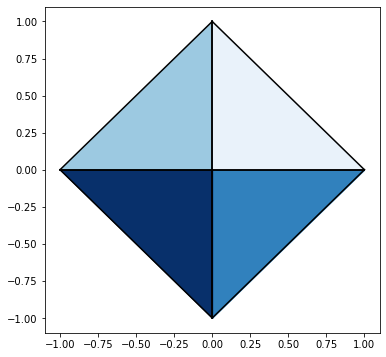

In [103]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)

In [104]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

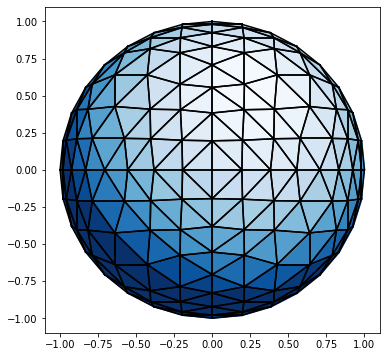

In [105]:
render(sphere_approx(3), lines='k')

## 연습문제

8면체를 이루는 12개 변을 정의하는 벡터 쌍을 구해서 그려라.

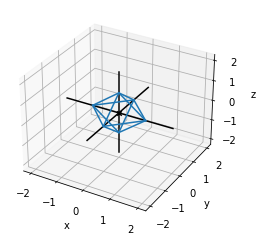

In [106]:
top = (0,0,1)
bottom = (0,0,-1)
xy_plane = [(1,0,0),(0,1,0),(-1,0,0),(0,-1,0)]
edges = [Segment3D(top,p) for p in xy_plane] +\
            [Segment3D(bottom, p) for p in xy_plane] +\
            [Segment3D(xy_plane[i],xy_plane[(i+1)%4]) for i in range(0,4)] 
draw3d(*edges)